In [1]:
import numpy as np
import awkward as ak
import fastjet
import uproot as ur
import matplotlib.colors as mcolors
import mplhep as hep
import matplotlib.pyplot as plt
import math
import matplotlib as colors
import matplotlib as abc
from scipy.optimize import curve_fit
import pandas as pd
from iminuit import Minuit
from iminuit.cost import LeastSquares
import pickle

hep.style.use(hep.style.CMS)
hep.style.use("CMS")
plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

In [2]:
generator="Pythia6"
with open('{}Gen_R_0.5_dR_0.25.pickle'.format(generator), 'rb') as handle:
    gen_dict = pickle.load(handle)
with open('{}Reco_R_0.5_dR_0.25.pickle'.format(generator), 'rb') as handle:
    reco_dict = pickle.load(handle)
lowerRange = 20 
upperRange = 80

events = len(reco_dict["energy"])
print(events)

994000


Text(0.5, 1.0, 'Pythia6 Fast Sim')

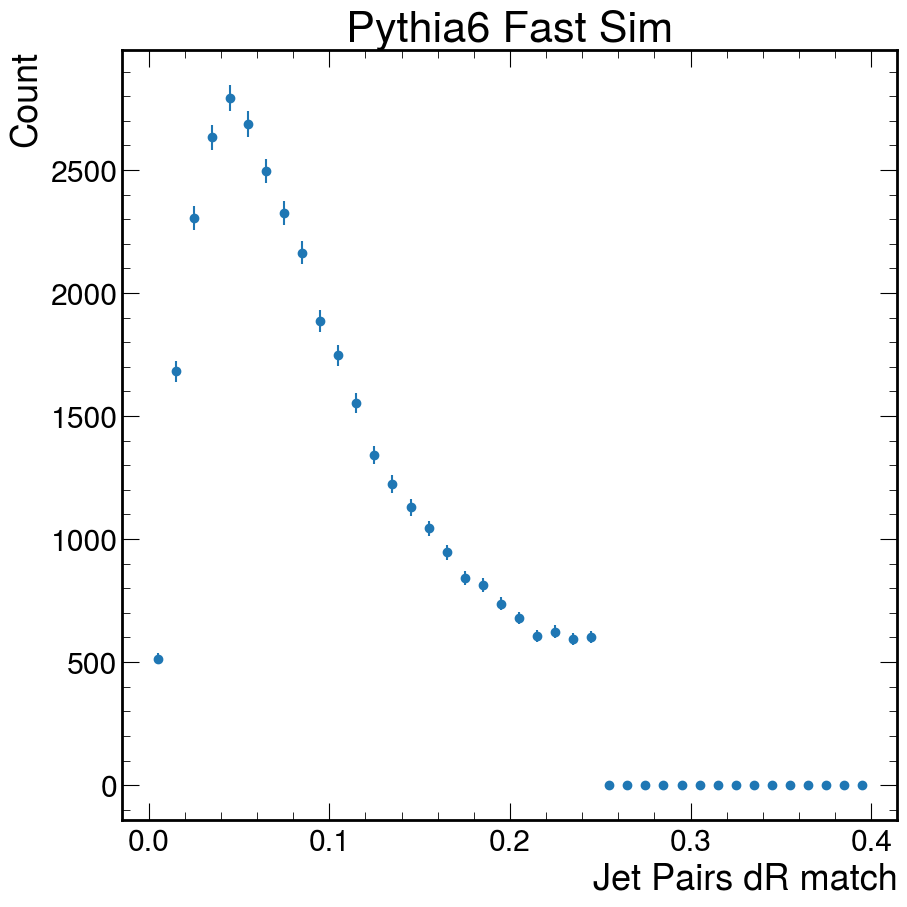

In [3]:
hist, bin_edges = np.histogram(ak.flatten(reco_dict['dR_new']),bins = 40, range=(0,0.4))
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
plt.errorbar(np.array(bin_centres),np.array(hist),yerr=np.sqrt(hist),fmt="o")

plt.xlabel('Jet Pairs dR match')
plt.ylabel('Count')
plt.title("{} Fast Sim".format(generator))

In [4]:
mask = (ak.flatten(reco_dict["matched_index_new"]) > -1)
matchedJetE = ak.flatten(reco_dict["energy"])[mask]
matchedJetEta = ak.flatten(reco_dict["eta"])[mask]
matchedJetPhi = ak.flatten(reco_dict["phi"])[mask]
#phiMask = (matchedJetPhi > -0.4) & (matchedJetPhi < 0.4)
#matchedJetE = matchedJetE[phiMask]


mask = (ak.flatten(gen_dict["matched_index_new"]) > -1)
matchedGjetE = ak.flatten(gen_dict["energy"])[mask]
matchedGjetEta = ak.flatten(gen_dict["eta"])[mask]
matchedGjetPhi = ak.flatten(gen_dict["phi"])[mask]
#matchedGjetE = matchedGjetE[phiMask]

mask = ak.flatten(reco_dict["matched_index_new"]) == -1
unmatchedJetE = ak.flatten(reco_dict["energy"])[mask]
unmatchedJetEta = ak.flatten(reco_dict["eta"])[mask]
unmatchedJetPhi = ak.flatten(reco_dict["phi"])[mask]

mask = ak.flatten(gen_dict["matched_index_new"]) == -1
unmatchedGjetE = ak.flatten(gen_dict["energy"])[mask]
unmatchedGjetEta = ak.flatten(gen_dict["eta"])[mask]
unmatchedGjetPhi = ak.flatten(gen_dict["phi"])[mask]

In [5]:
PairedGenE = matchedGjetE
PairedRecoE = matchedJetE
JetR = PairedRecoE/PairedGenE

Text(0, 1, 'Ratio')

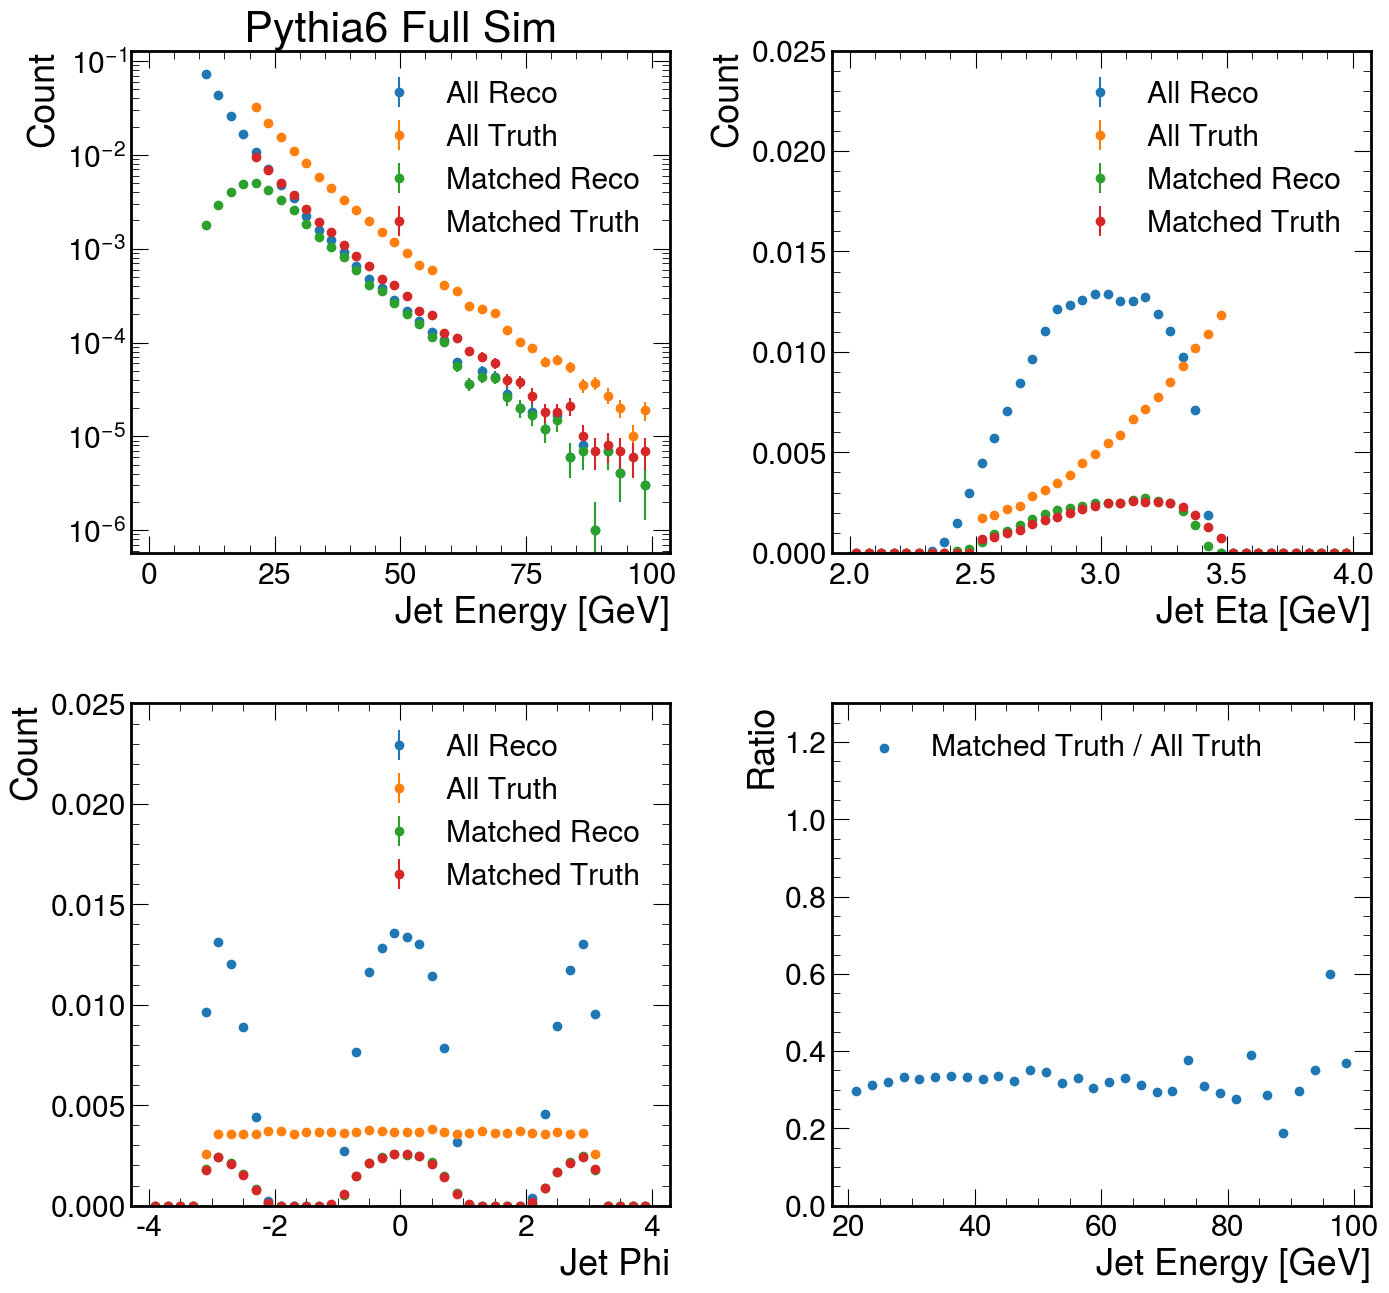

In [16]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 15), gridspec_kw={'wspace': 0.3,'hspace': 0.3})

plt.sca(axs[0][0])


hist, bin_edges = np.histogram(ak.flatten(reco_dict["energy"]),range=(0,100),bins=40)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
plt.errorbar(np.array(bin_centres),np.array(hist)/events,yerr=np.sqrt(hist)/events,fmt="o", label="All Reco")

hist, bin_edges = np.histogram(ak.flatten(gen_dict["energy"]),range=(0,100),bins=40)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
plt.errorbar(np.array(bin_centres),np.array(hist)/events,yerr=np.sqrt(hist)/events,fmt="o", label="All Truth")

hist, bin_edges = np.histogram(matchedJetE,range=(0,100),bins=40)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
plt.errorbar(np.array(bin_centres),np.array(hist)/events,yerr=np.sqrt(hist)/events,fmt="o", label="Matched Reco")

hist, bin_edges = np.histogram(matchedGjetE,range=(0,100),bins=40)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
plt.errorbar(np.array(bin_centres),np.array(hist)/events,yerr=np.sqrt(hist)/events,fmt="o", label="Matched Truth")

plt.legend()


plt.yscale("log")
plt.xlabel('Jet Energy [GeV]')
plt.ylabel('Count')
plt.title("{} Full Sim".format(generator))

plt.sca(axs[0][1])


hist, bin_edges = np.histogram(ak.flatten(reco_dict["eta"]),range=(2,4),bins=40)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
plt.errorbar(np.array(bin_centres),np.array(hist)/events,yerr=np.sqrt(hist)/events,fmt="o", label="All Reco")

hist, bin_edges = np.histogram(ak.flatten(gen_dict["eta"]),range=(2,4),bins=40)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
plt.errorbar(np.array(bin_centres),np.array(hist)/events,yerr=np.sqrt(hist)/events,fmt="o", label="All Truth")

hist, bin_edges = np.histogram(matchedJetEta,range=(2,4),bins=40)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
plt.errorbar(np.array(bin_centres),np.array(hist)/events,yerr=np.sqrt(hist)/events,fmt="o", label="Matched Reco")

hist, bin_edges = np.histogram(matchedGjetEta,range=(2,4),bins=40)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
plt.errorbar(np.array(bin_centres),np.array(hist)/events,yerr=np.sqrt(hist)/events,fmt="o", label="Matched Truth")



plt.legend(loc='upper right')
plt.ylim(0,0.025)


plt.xlabel('Jet Eta [GeV]')
plt.ylabel('Count')



plt.sca(axs[1][0])



hist, bin_edges = np.histogram(ak.flatten(reco_dict["phi"]),range=(-4,4),bins=40)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
plt.errorbar(np.array(bin_centres),np.array(hist)/events,yerr=np.sqrt(hist)/events,fmt="o", label="All Reco")

hist, bin_edges = np.histogram(ak.flatten(gen_dict["phi"]),range=(-4,4),bins=40)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
plt.errorbar(np.array(bin_centres),np.array(hist)/events,yerr=np.sqrt(hist)/events,fmt="o", label="All Truth")

hist, bin_edges = np.histogram(matchedJetPhi,range=(-4,4),bins=40)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
plt.errorbar(np.array(bin_centres),np.array(hist)/events,yerr=np.sqrt(hist)/events,fmt="o", label="Matched Reco")

hist, bin_edges = np.histogram(matchedGjetPhi,range=(-4,4),bins=40)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
plt.errorbar(np.array(bin_centres),np.array(hist)/events,yerr=np.sqrt(hist)/events,fmt="o", label="Matched Truth")

plt.legend(loc="upper right")
plt.ylim(0,0.025)

plt.xlabel('Jet Phi')
plt.ylabel('Count')




plt.sca(axs[1][1])
hist2, bin_edges = np.histogram(ak.flatten(gen_dict["energy"]),range=(0,100),bins=40)

hist1, bin_edges = np.histogram(matchedGjetE,bins = 40, range=(0,100))
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2


plt.scatter(np.array(bin_centres),np.array(hist1/hist2),marker="o", label="Matched Truth / All Truth")


plt.legend(loc="upper left")
plt.ylim(0,1.3)
plt.xlabel('Jet Energy [GeV]')
plt.ylabel('Ratio')

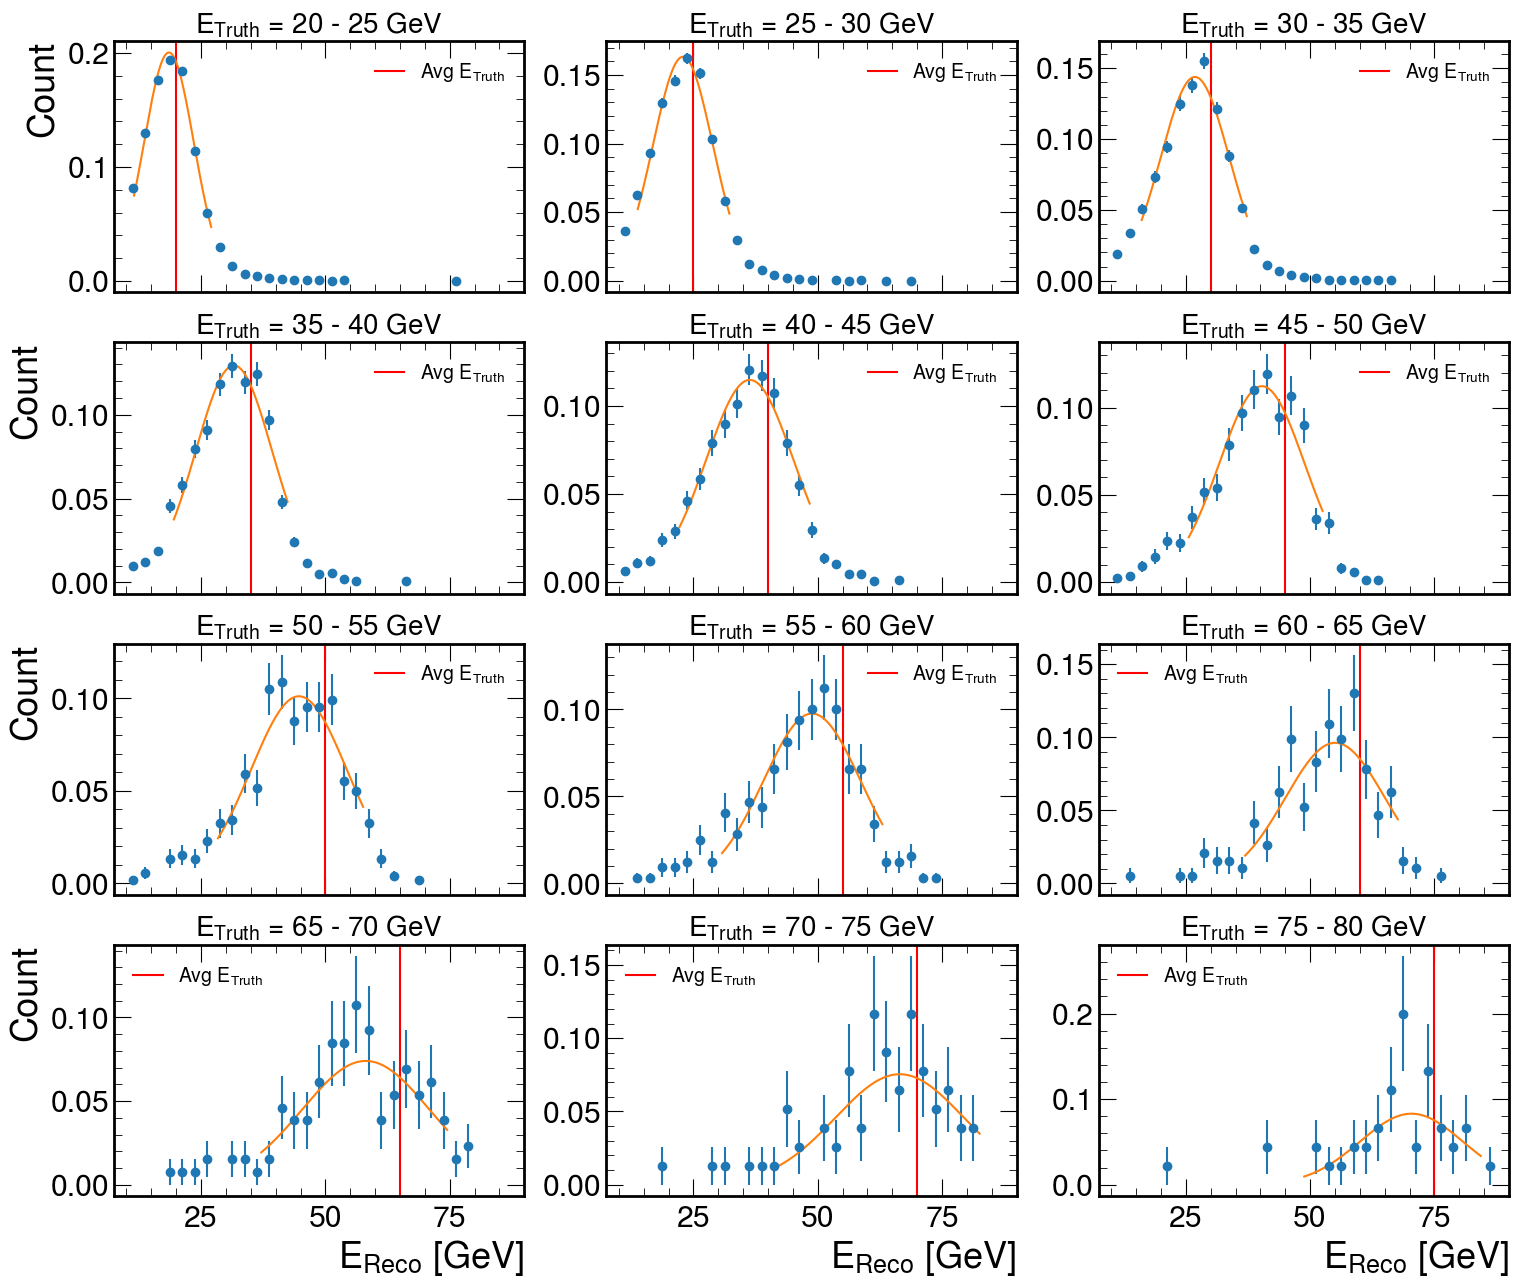

In [18]:
fig, axs=plt.subplots(4, 3, figsize=(18,15),sharex=True)
#fig.subplots_adjust(wspace=0.4, hspace=0)

def gauss(x, A, mu, sigma):
    #A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))
    
def least_squares_loss(A, mu, sigma):
    y = gauss(bins, A, mu, sigma)
    return np.sum((hist - y)**2)


AvgEReco = []
AvgERecoErr = []

NumEReco = []
NumERecoErr = []

GenSlice = []
EBin = 0
for i in range(lowerRange,upperRange,5):
 
    x = (EBin) // 3  
    y = (EBin) % 3
    EBin += 1
    plt.sca(axs[x][y])
        
    genEBin = (PairedGenE > (i)) & (PairedGenE < (i+5))
    
    hist, bin_edges = np.histogram(PairedRecoE[genEBin],bins=40,range=(0,100))
    
    zerocut = (hist > 0)
    total = np.sum(hist[zerocut])
    errs = np.sqrt(hist[zerocut]) / total
    hist = hist[zerocut] / total
    
    bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
    bins = bin_centres[zerocut]
    
    minFit = bins[np.argmax(hist)] - 10
    maxFit = bins[np.argmax(hist)] + 10

    minFit = np.mean(PairedRecoE[genEBin]) - 1.5 * np.std(PairedRecoE[genEBin])
    maxFit = np.mean(PairedRecoE[genEBin]) + 1.5 * np.std(PairedRecoE[genEBin])

    fitCut = (bins > minFit) & (bins < maxFit)
    plt.errorbar(np.array(bins),np.array(hist),yerr=errs,fmt="o")
    
    plt.axvline(i,color='red',label=r"Avg $E_{Truth}$")
    GenSlice.append((i+0.5)*10)
       
    least_squares = LeastSquares(list(bins[fitCut]),list(hist[fitCut]),list(errs[fitCut]),gauss)
    m = Minuit(least_squares, A=max(hist), mu = np.mean(PairedRecoE[genEBin]), sigma = np.std(PairedRecoE[genEBin]))
    m.limits["mu"] = (minFit, maxFit)
    m.migrad()
    m.hesse()
   
    fitPlotCut = (np.linspace(0,150,5000) > minFit) & (np.linspace(0,150,5000) < maxFit)
    hist_fit = gauss(np.linspace(0,150,5000)[fitPlotCut], m.values[0],m.values[1],m.values[2])
    plt.plot(np.linspace(0,150,5000)[fitPlotCut], hist_fit)
    
    NumEReco.append(np.mean(PairedRecoE[genEBin]))
    NumERecoErr.append(np.std(PairedRecoE[genEBin]))

    if not math.isnan(m.values[1]) :
        AvgEReco.append(m.values[1])
        AvgERecoErr.append(m.errors[1]/total)
    else:
        AvgEReco.append(0)
        AvgERecoErr.append(0)

  
    if(y == 0):
        plt.ylabel("Count")
    if(x == 3):
        plt.xlabel(r"$E_{Reco}$ [GeV]")
    #plt.title('Gen Jet %2.0f - %2.0f GeV'%(i*10, (i+1)*10),fontsize=20)
    plt.legend(loc='best',fontsize=14)

    plt.title(r'$E_{Truth}$ = %2.0f - %2.0f GeV'%(i, i+(5)),fontsize=20)
    #plt.yscale("log")
    #plt.ylim(0,0.35)

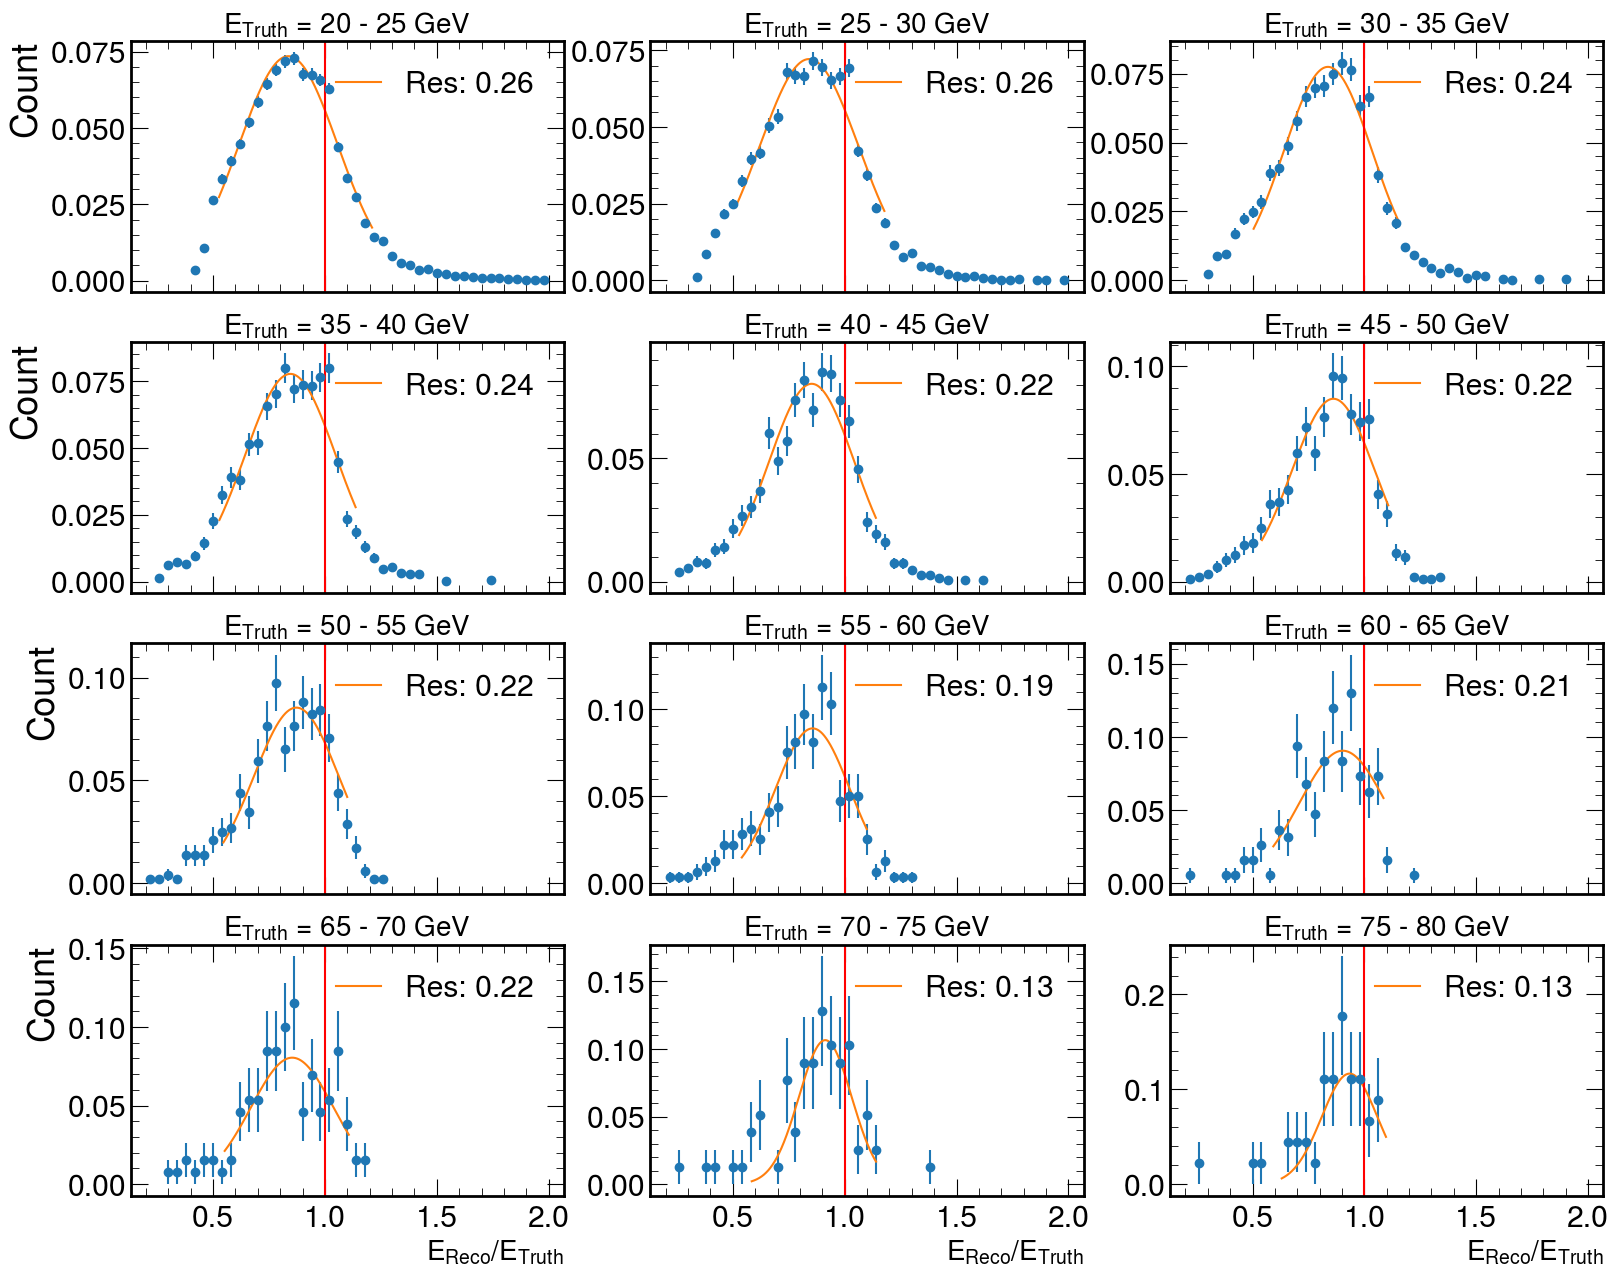

In [8]:
fig, axs=plt.subplots(4, 3, figsize=(19,15),sharex=True)
#fig.subplots_adjust(wspace=0.4, hspace=0)
#JetR = PairedRecoE/PairedGenE
AvgR = []
AvgRErr = []

NumR = []
NumRErr = []

Res = []
ResErr = []

Sigma = []
SigmaErr = []

EBin = 0
for i in range(lowerRange,upperRange,5):
    x = EBin // 3  
    y = EBin % 3
    EBin += 1
    plt.sca(axs[x][y])
        
    genEBin = (PairedGenE > i) & (PairedGenE < i+5)
    
    hist, bin_edges = np.histogram(JetR[genEBin],bins=50,range=(0,2))
    bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
    bins = bin_centres
    
    zerocut = (hist > 0)
    total = np.sum(hist[zerocut])
    errs = np.sqrt(hist[zerocut]) / total
    hist = hist[zerocut] / total
    
    bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
    bins = bin_centres[zerocut]
    
    plt.errorbar(np.array(bins),np.array(hist),yerr=errs,fmt="o")

    minFit = bins[np.argmax(hist)] - 0.3
    maxFit = bins[np.argmax(hist)] + 0.3

    minFit = np.mean(JetR[genEBin]) - 1.5 * np.std(JetR[genEBin])
    maxFit = np.mean(JetR[genEBin]) + 1.5 * np.std(JetR[genEBin])
 
    fitCut = (bins > minFit) & (bins < maxFit)
    
    
    least_squares = LeastSquares(np.array(bins[fitCut]),np.array(hist[fitCut]),np.array(errs[fitCut]),gauss)
    
    m = Minuit(least_squares, A=max(hist), mu = 1.0, sigma = np.std(PairedRecoE[genEBin]/PairedGenE[genEBin]))
    
    m.migrad()
    m.hesse()
    
    fitPlotCut = (np.linspace(0,2,5000) > minFit) & (np.linspace(0,2,5000) < maxFit)
    hist_fit = gauss(np.linspace(0,2,5000)[fitPlotCut], m.values[0],m.values[1],m.values[2])
    plt.plot(np.linspace(0,2,5000)[fitPlotCut], hist_fit, label = "Res: %2.2f"%(np.abs(m.values[2]) / m.values[1]))
    
    NumR.append(np.mean(PairedRecoE[genEBin]/PairedGenE[genEBin]))
    NumRErr.append(np.std(PairedRecoE[genEBin]/PairedGenE[genEBin]))
    plt.axvline(1,color='red')
    if (not math.isnan(m.values[1])):
        AvgR.append(m.values[1])
        Res.append(np.abs(m.values[2]) / m.values[1])
        ResErr.append(m.errors[2] / m.values[1])

        Sigma.append(np.abs(m.values[2]))
        SigmaErr.append(m.errors[2])

        
        
        AvgRErr.append(m.errors[1])

    else:
        AvgR.append(0)
        AvgRErr.append(0)

  
    if(y == 0):
        plt.ylabel("Count")
    if(x == 3):
        plt.xlabel(r"$E_{Reco}$/$E_{Truth}$",fontsize=20)
    plt.title(r'$E_{Truth}$ = %2.0f - %2.0f GeV'%(i, i+5),fontsize=20)
    plt.legend(loc="upper right")
    #plt.yscale("log")
    #plt.ylim(0,0.23)

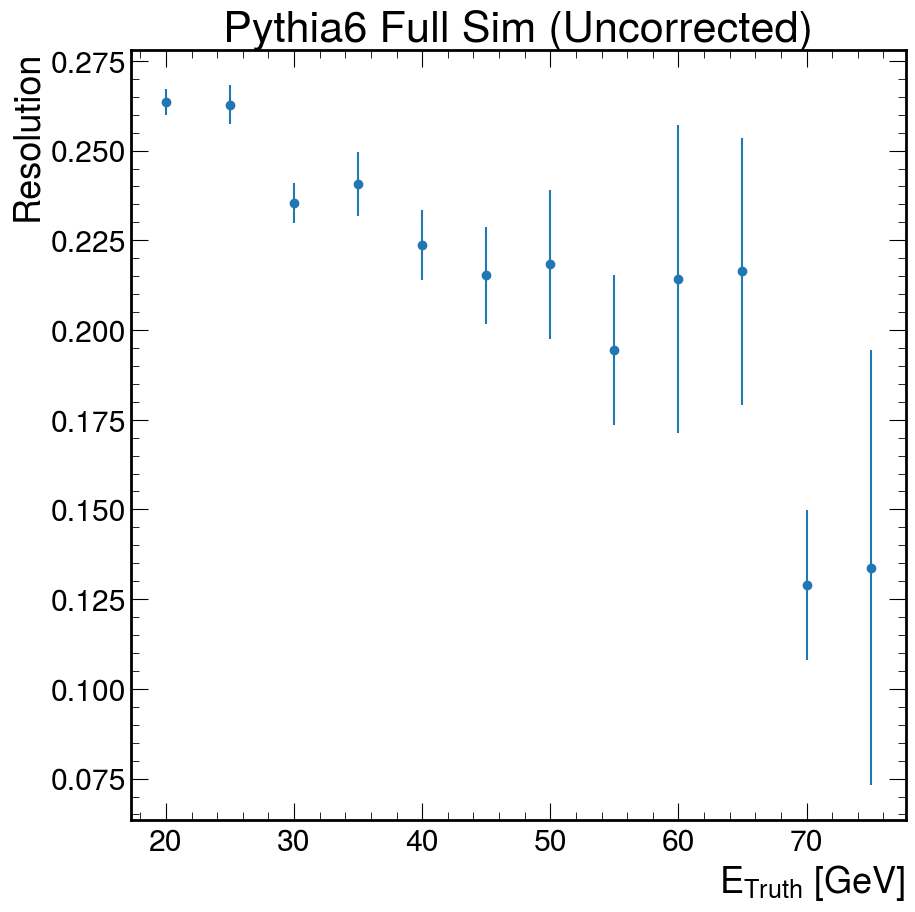

In [9]:
bin_centres = range(lowerRange,upperRange,5)

plt.errorbar(bin_centres,Res,yerr=ResErr,fmt="o")

plt.xlabel(r'$E_{Truth}$ [GeV]')
plt.ylabel('Resolution')
plt.title("Pythia6 Full Sim (Uncorrected)")
#plt.ylim(0,0.3)
with open('Res_{}_UC.pickle'.format(generator), 'wb') as f:
    pickle.dump((np.array(bin_centres), Res, ResErr), f)


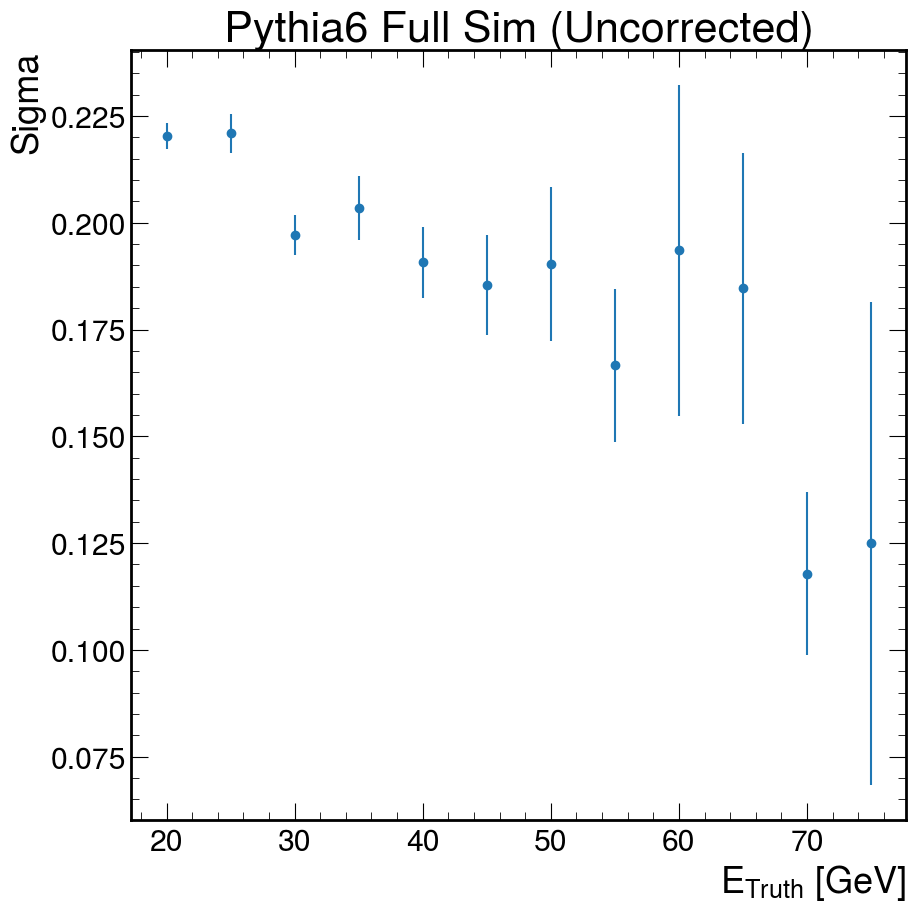

In [10]:
bin_centres = range(lowerRange,upperRange,5)

plt.errorbar(bin_centres,Sigma,yerr=SigmaErr,fmt="o")

plt.xlabel(r'$E_{Truth}$ [GeV]')
plt.ylabel('Sigma')
plt.title("Pythia6 Full Sim (Uncorrected)")
#plt.ylim(0,0.3)
with open('Sigma_{}_UC.pickle'.format(generator), 'wb') as f:
    pickle.dump((np.array(bin_centres), Res, ResErr), f)


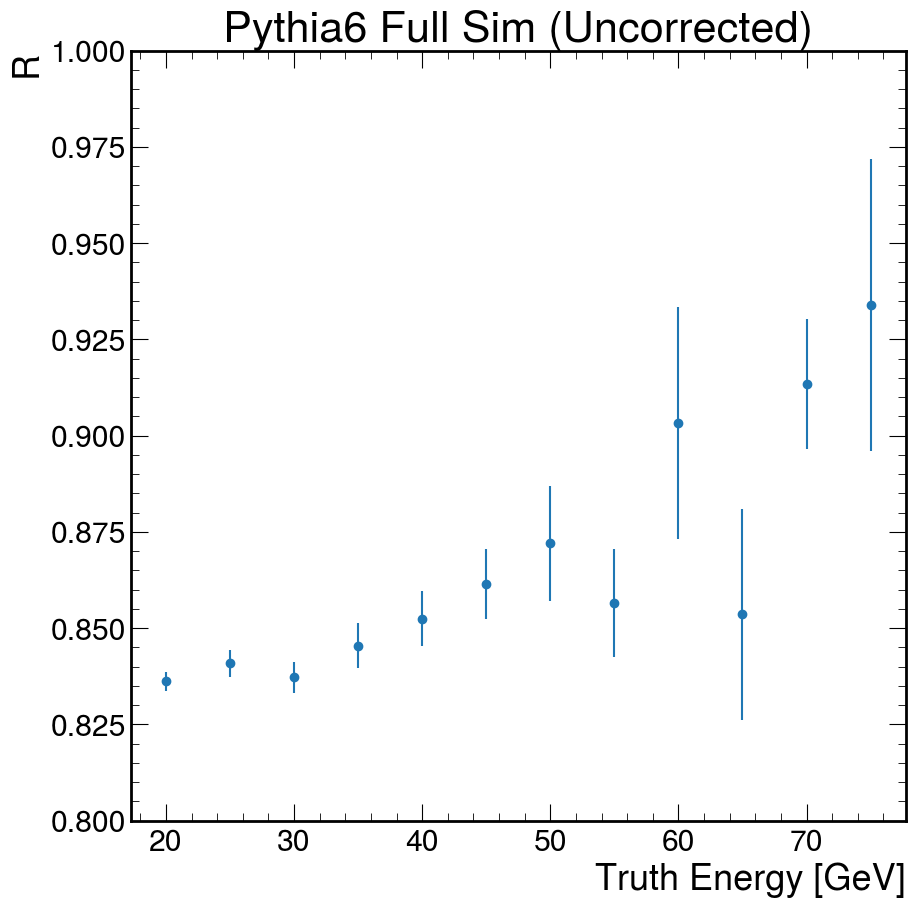

In [11]:
plt.errorbar(bin_centres,AvgR,yerr=AvgRErr,fmt="o")

plt.xlabel('Truth Energy [GeV]')
plt.ylabel('R')
plt.title("Pythia6 Full Sim (Uncorrected)")
plt.ylim(0.8,1.0)
with open('R_{}_UC.pickle'.format(generator), 'wb') as f:
    pickle.dump((np.array(bin_centres), AvgR, AvgRErr), f)

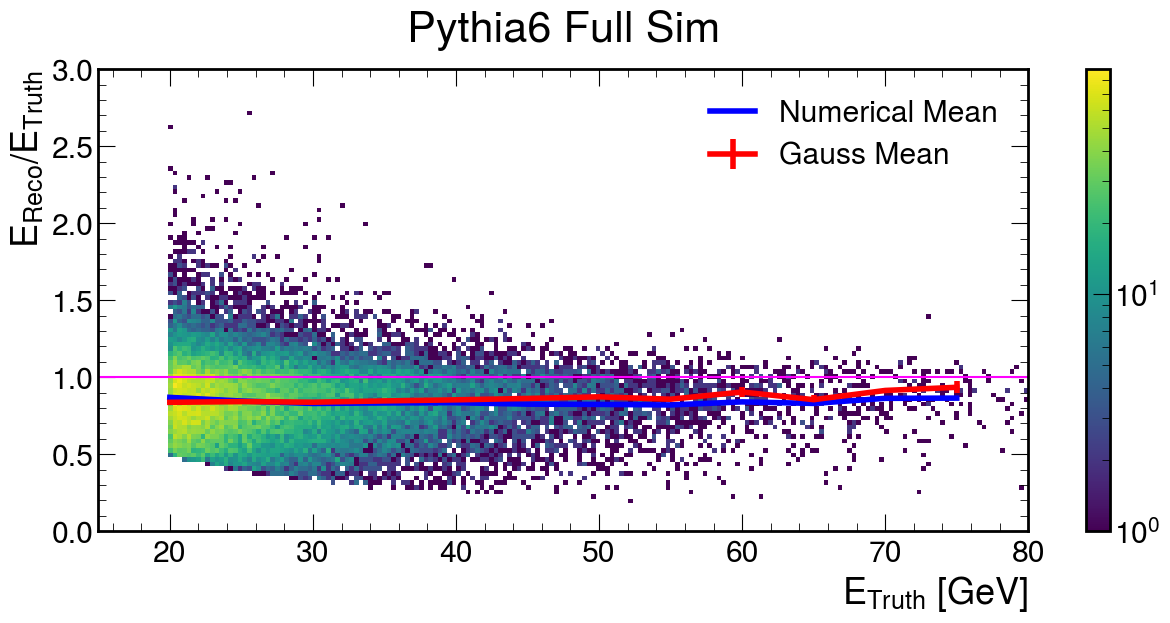

In [12]:
fig = plt.figure(figsize=(15,6))

plt.hist2d(np.array(PairedGenE),np.array(JetR),bins=(200,100),range=([15,80],[0,3]),cmap='viridis',norm=abc.colors.LogNorm())
cbar = plt.colorbar()
plt.errorbar(bin_centres, AvgR, yerr=AvgRErr,color='red',label="Gauss Mean",linewidth=4)
plt.plot(bin_centres, NumR, color='blue',label="Numerical Mean",linewidth=4)
plt.plot(np.linspace(0,200,1000),np.ones(1000),color='magenta')
plt.legend()
plt.xlabel(r'$E_{Truth}$ [GeV]')
plt.ylabel(r'$E_{Reco}$/$E_{Truth}$')
plt.title("{} Full Sim".format(generator),pad = 20.0)
plt.show()

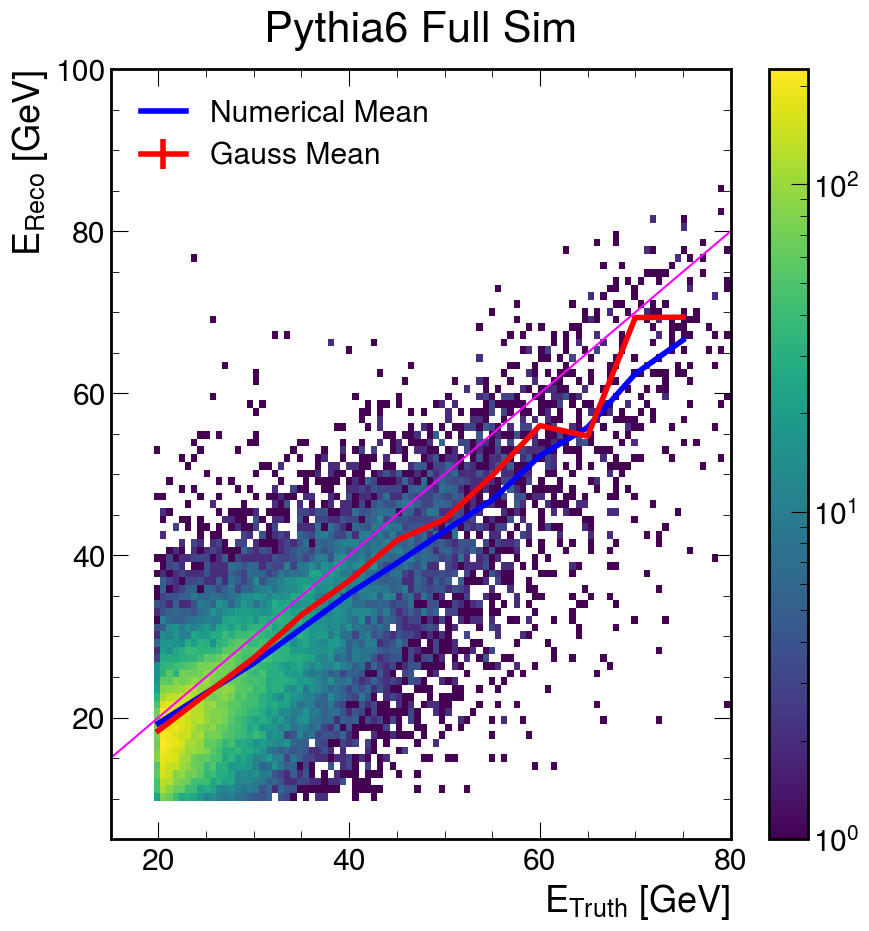

In [13]:
plt.hist2d(np.array(PairedGenE),np.array(PairedRecoE),bins=(100,100),range=([15,80],[5,100]),cmap='viridis',norm=abc.colors.LogNorm())
cbar = plt.colorbar()
plt.errorbar(bin_centres, AvgEReco, yerr=AvgERecoErr,color='red',label="Gauss Mean",linewidth=4)
plt.plot(bin_centres, NumEReco, color='blue',label="Numerical Mean",linewidth=4)
plt.plot(np.linspace(0,200,1000),np.linspace(0,200,1000),color='magenta')
plt.legend(loc='upper left')
plt.xlabel(r'$E_{Truth}$ [GeV]')
plt.ylabel(r'$E_{Reco}$ [GeV]')
plt.title("{} Full Sim".format(generator),pad = 20.0)
plt.show()

/tmp/ipykernel_855820/2189924922.py:4: RuntimeWarning: divide by zero encountered in log
  return A + (B*np.log(ereco))


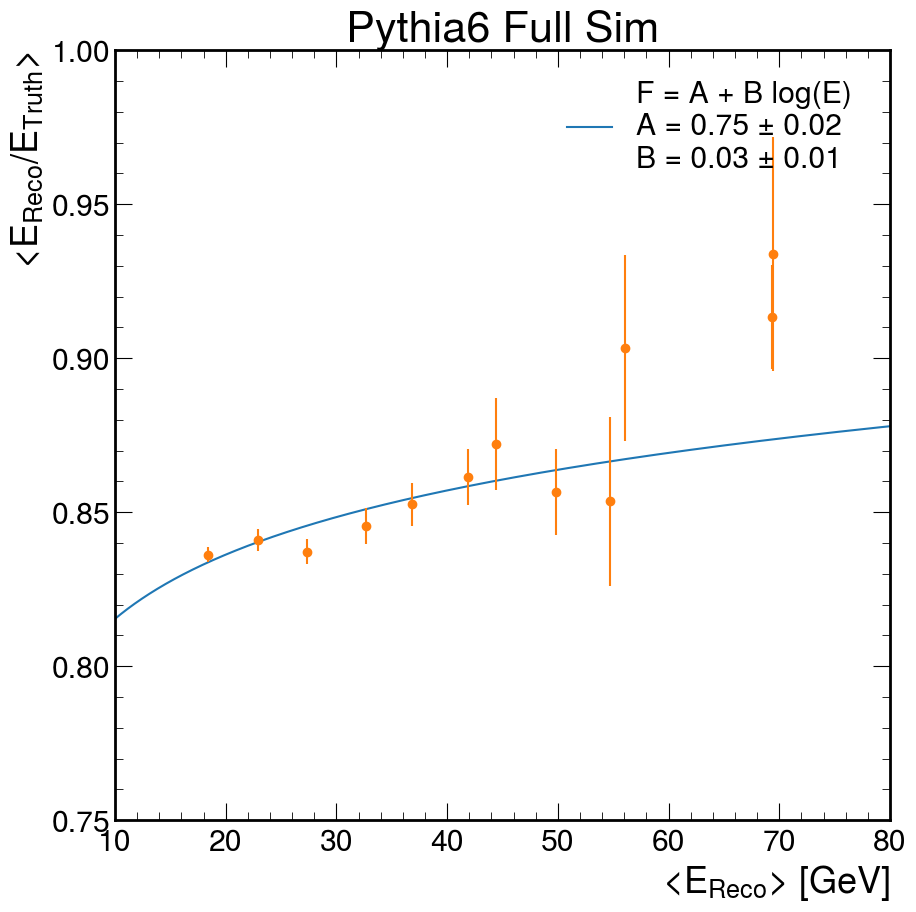

In [14]:
from scipy.interpolate import CubicSpline

def correct(ereco, A, B):
    return A + (B*np.log(ereco))
least_squares = LeastSquares(AvgEReco,AvgR,AvgRErr,correct)

m = Minuit(least_squares, A=0.64, B = 0.03)

m.limits["B"] = (0.01, 1)
m.limits["A"] = (0, 1)
m.migrad()
m.hesse()
#plt.plot(np.linspace(0,100,5000), correct(np.linspace(0,100,5000), 0.64, 0.1, -0.01))
correct_fit = correct(np.linspace(0,100,5000), m.values[0], m.values[1])
plt.plot(np.linspace(0,100,5000), correct_fit, label="F = A + B log(E) \nA = %2.2f ± %2.2f\nB = %2.2f ± %2.2f"%(m.values[0],m.errors[0],m.values[1],m.errors[1]))

plt.legend()


#spl = CubicSpline(AvgEReco, AvgR)

#xnew = np.linspace(0, 100, num=1001)
#spl = BSpline(*tck)(xnew)

def custom_spline(x):
    if isinstance(x, (list, np.ndarray)):
        return np.array([custom_spline(xi) for xi in x])
    
    if x <= AvgEReco[-1] and x >= AvgEReco[0]:
        return spl(x)
    elif x >= AvgEReco[-1]:
        return AvgR[-1]
    else:
        return AvgR[0]


#plt.plot(xnew,custom_spline(xnew))
#plt.plot(xnew,spl)

plt.errorbar(np.array(AvgEReco),np.array(AvgR),xerr=AvgERecoErr,yerr=AvgRErr,fmt="o")
plt.ylim(0.75,1)
plt.xlim(10,80)
plt.title("{} Full Sim".format(generator))
plt.ylabel(r"<$E_{Reco}$/$E_{Truth}$>")
plt.xlabel(r"<$E_{Reco}$> [GeV]")

with open('Scale_{}.pickle'.format(generator), 'wb') as f:
    pickle.dump((m.values[0], m.values[1]),  f)